Shape do HDU0: (15426, 2, 75, 75)
Shape do HDU1: (15426,)
Desenhando imagens com índices:
[11604  6546  4399  8224  8281 14554  5612  7760 13305 10732 12592 10963
 13817  3822  9895  5793]


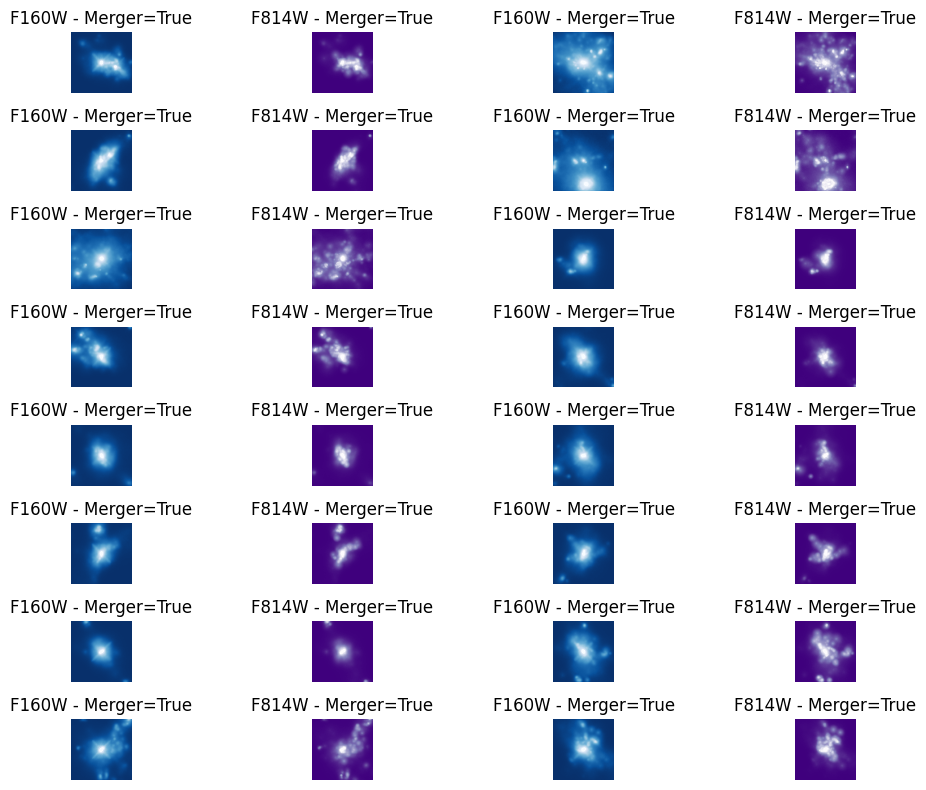

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import simple_norm
import time

#Pega o tempo do relógio do sistema
start_time = time.time()

# Caminho do arquivo FITS
datafile_path = r"C:\Users\Cliente\Documents\TCC NATALI\hlsp_deepmerge_hst_acs-wfc3_illustris-z2_f814w-f160w_v1_sim-pristine.fits"

# Abrir o arquivo FITS
hdulist = fits.open(datafile_path)

# Acessar o cabeçalho do primeiro HDU (hdu[0])
header = hdulist[0].header

Plot_sample_images = True

# Definir a seed para garantir a mesma seleção de imagens
np.random.seed(206265)  # descomente para obter sempre a mesma seleção

# Verifique a forma dos dados
shape_hdu0 = hdulist[0].data.shape
shape_hdu1 = hdulist[1].data.shape
print(f"Shape do HDU0: {shape_hdu0}")
print(f"Shape do HDU1: {shape_hdu1}")

# Assumindo que os dados de imagem em cada HDU são 2D
Y = hdulist[1].data

if Plot_sample_images:
    # Selecionar 16 imagens aleatórias
    example_ids = np.random.choice(len(hdulist[0].data), 16)
    print("Desenhando imagens com índices:")
    print(example_ids)
    
    # F160W é um filtro transparente no intervalo de ~ 1400 nm a 1700 nm (FIR)
    # F814W é um filtro transparente no intervalo de ~ 700 nm a 960 nm   (NIR)
    
    # Pegar as imagens F160W (índice=1) e F814W (índice=0) do conjunto de dados simulado para as seleções
    examples_f160w = [hdulist[0].data[j, 1, :, :] for j in example_ids]  # Acesse diretamente o HDU 0
    examples_f814w = [hdulist[0].data[j, 0, :, :] for j in example_ids]  # Acesse diretamente o HDU 0
    
    # Inicializar a figura
    fig = plt.figure(figsize=(11, 8))  
    # Ajuste a altura para separar as imagens
    
    # Loop pelas imagens selecionadas aleatoriamente e plotar com rótulos
    for i, (image_f160w, image_f814w) in enumerate(zip(examples_f160w, examples_f814w)):
        # F160W
        ax1 = fig.add_subplot(8, 4, i * 2 + 1)  # Ajuste o layout para 8 linhas e 4 colunas
        norm1 = simple_norm(image_f160w, 'log', max_percent=99.75)
        ax1.imshow(image_f160w, aspect='equal', cmap='Blues_r', norm=norm1)
        ax1.set_title('F160W - Merger=' + str(bool(Y[example_ids[i]])))
        ax1.axis('off')
    
        # F814W
        ax2 = fig.add_subplot(8, 4, i * 2 + 2)  # Ajuste o layout para 8 linhas e 4 colunas
        norm2 = simple_norm(image_f814w, 'log', max_percent=99.75)
        ax2.imshow(image_f814w, aspect='equal', cmap='Purples_r', norm=norm2)
        ax2.set_title('F814W - Merger=' + str(bool(Y[example_ids[i]])))
        ax2.axis('off')
    
    plt.tight_layout()
    plt.show()

Desenhando imagens com índice:
11604


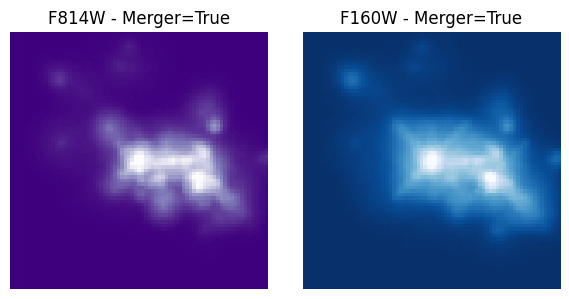

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import simple_norm
import time

#Pega o tempo do relógio do sistema
start_time = time.time()

# Caminho do arquivo FITS
datafile_path = r"C:\Users\Cliente\Documents\TCC NATALI\hlsp_deepmerge_hst_acs-wfc3_illustris-z2_f814w-f160w_v1_sim-pristine.fits"

# Abrir o arquivo FITS
hdulist = fits.open(datafile_path)

# Acessar o cabeçalho do primeiro HDU (hdu[0])
header = hdulist[0].header

Plot_sample_images = True

# Definir a seed para garantir a mesma seleção de imagens
np.random.seed(206265)  # descomente para obter sempre a mesma seleção

# Verifique a forma dos dados
shape_hdu0 = hdulist[0].data.shape
shape_hdu1 = hdulist[1].data.shape
#print(f"Shape do HDU0: {shape_hdu0}")
#print(f"Shape do HDU1: {shape_hdu1}")

# Assumindo que os dados de imagem em cada HDU são 2D
Y = hdulist[1].data

if Plot_sample_images:
    # Selecionar 1 imagem aleatória
    example_id = np.random.choice(len(hdulist[0].data))  # Seleciona uma imagem
    print("Desenhando imagens com índice:")
    print(example_id)

    # Acessar os dados de cada filtro separadamente
    image_f814w = hdulist[0].data[example_id, 0, :, :] # Supondo que o filtro F814W está no índice 0
    image_f160w = hdulist[0].data[example_id, 1, :, :] # Supondo que o filtro F160W está no índice 1

    # Inicializar a figura
    fig = plt.figure(figsize=(6, 3))  # Ajuste o tamanho da figura para um artigo

    # F814W
    ax1 = fig.add_subplot(1, 2, 1)  
    norm1 = simple_norm(image_f814w, 'log', max_percent=99.75)
    ax1.imshow(image_f814w, aspect='equal', cmap='Purples_r', norm=norm1)
    ax1.set_title('F814W - Merger=' + str(bool(Y[example_id])))
    ax1.axis('off')

    # F160W
    ax2 = fig.add_subplot(1, 2, 2)  
    norm2 = simple_norm(image_f160w, 'log', max_percent=99.75)
    ax2.imshow(image_f160w, aspect='equal', cmap='Blues_r', norm=norm2)
    ax2.set_title('F160W - Merger=' + str(bool(Y[example_id])))
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

In [11]:
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm

# Caminho para o arquivo FITS
file_path = r"C:\Users\Cliente\Documents\TCC NATALI\hlsp_deepmerge_hst_acs-wfc3_illustris-z2_f814w-f160w_v1_sim-pristine.fits"

# Abrir o arquivo FITS
hdulist = fits.open(datafile_path)

# Extrai as imagens do HDU[0] e imprime o shape
images = hdulist[0].data
print(f"Shape das imagens: {images.shape}")

# Salve todas as imagens, de ambos os filtros, na variável X
X = images
print(X.shape)

# N é o número de imagens originais nos dados
N = len(X)
print(len(X))

#Extrai os Y (classificação em merger (True) ou não-merger (False)) do HDU[1] e imprime o shape
Y = hdulist[1].data
print(f"Shape dos Y: {Y.shape}")

# Salva o array Y em um aray
Y = np.array(Y)

#Tempo de processamento
t_file_read = time.time()-start_time
print("tempo para ler dados do arquivo: {:0.3f} s".format(t_file_read))

Shape das imagens: (15426, 2, 75, 75)
(15426, 2, 75, 75)
15426
Shape dos Y: (15426,)
tempo para ler dados do arquivo: 381.543 s


In [12]:
try:
  list_of_mergers = np.where(Y == 1.)[0]
  list_of_nonmergers = np.where(Y == 0.)[0]
except:
  data_hdu1_vec = np.array([y[0] for y in Y])
  list_of_mergers = np.where(data_hdu1_vec == 1.)[0]
  list_of_nonmergers = np.where(data_hdu1_vec == 0.)[0]

# Imprimir os 5 primeiros elementos de cada lista e seus shapes
print("Primeiros 5 elementos de list_of_mergers:")
print(list_of_mergers[:5])
print("Últimos 5 elementos de list_of_mergers:")
print(list_of_mergers[-5:])
print(f"Shape de list_of_mergers: {list_of_mergers.shape}")

print("\nPrimeiros 5 elementos de list_of_nonmergers:")
print(list_of_nonmergers[:5])
print("Últimos 5 elementos de list_of_nonmergers:")
print(list_of_nonmergers[-5:])
print(f"Shape de list_of_nonmergers: {list_of_nonmergers.shape}")

Primeiros 5 elementos de list_of_mergers:
[0 1 2 3 4]
Últimos 5 elementos de list_of_mergers:
[8115 8116 8117 8118 8119]
Shape de list_of_mergers: (8120,)

Primeiros 5 elementos de list_of_nonmergers:
[8120 8121 8122 8123 8124]
Últimos 5 elementos de list_of_nonmergers:
[15421 15422 15423 15424 15425]
Shape de list_of_nonmergers: (7306,)


In [13]:
conditioning_time = time.time()
# Transpõe os dados para o formato channels last
X = X.transpose(0, 2, 3, 1)
print("Após transposição:", X.shape)

# Normaliza cada imagem para o intervalo [0, 1]
for i in range(N):
    X[i] = X[i] / np.max(X[i])
print("Após normalização:", np.max(X)) # saída esperada: 1.0

#Tempo de processamento
conditioning_time = time.time()-conditioning_time
print("tempo para condicionar e normalizar os dados: {:0.3f} s".format(conditioning_time))

Após transposição: (15426, 75, 75, 2)
Após normalização: 1.0
tempo para condicionar e normalizar os dados: 4.719 s


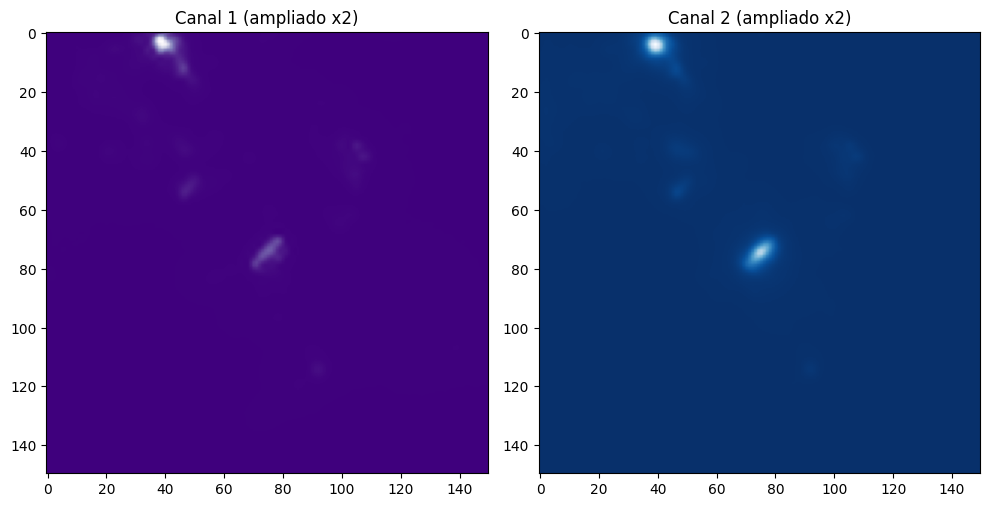

In [31]:
from scipy.ndimage import zoom
import random
import matplotlib.pyplot as plt

# Selecionar um índice aleatório de imagem
random.seed(206265)
indice_aleatorio = random.randint(0, len(X) - 1)

# Selecionar a imagem com o índice aleatório
imagem_selecionada = X[indice_aleatorio]

Plot_zoomed_image = True
if Plot_zoomed_image:
    # Separar os canais (adaptado para lidar com número variável de canais)
    num_canais = imagem_selecionada.shape[2] 
    canais = [imagem_selecionada[:, :, i] for i in range(num_canais)]

    # Aumentar a resolução por um fator de 2 (ajuste este valor conforme necessário)
    fator_ampliacao = 2
    canais_ampliados = [zoom(canal, fator_ampliacao) for canal in canais]

    # Criar uma figura com subplots para cada canal
    fig, axs = plt.subplots(1, num_canais, figsize=(5 * num_canais, 5))

    # Exibir os canais como imagens nas subplots
    for i, canal_ampliado in enumerate(canais_ampliados):
        axs[i].imshow(canal_ampliado, cmap='Purples_r' if i == 0 else 'Blues_r' if i == 1 else 'Greens_r')
        axs[i].set_title(f"Canal {i+1} (ampliado x{fator_ampliacao})")

    # Ajustar o layout
    plt.tight_layout()
    
# Mostrar a figura
plt.show()

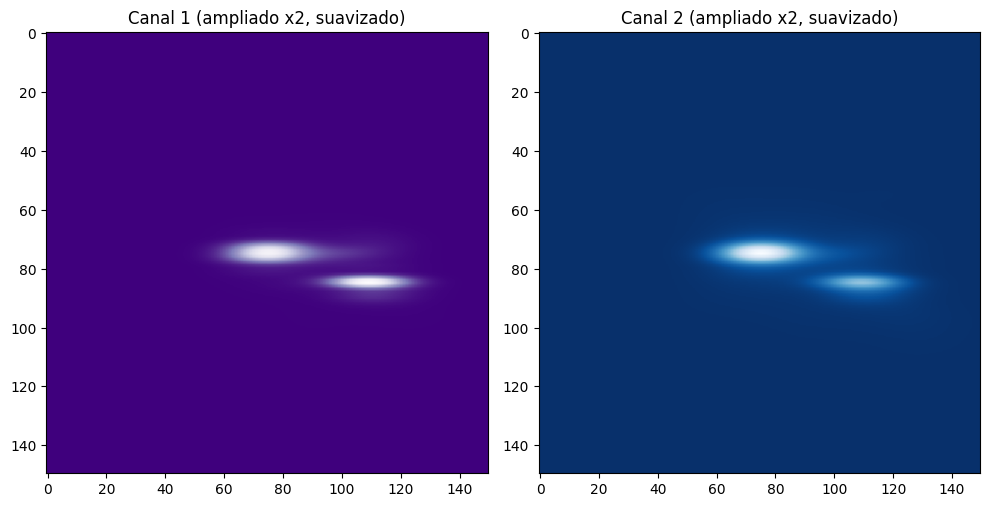

In [60]:
from scipy.ndimage import zoom, gaussian_filter
import random
import matplotlib.pyplot as plt
import numpy as np

# Selecionar a imagem com o índice aleatório
imagem_selecionada = X[11604]

Plot_zoomed_image = True
if Plot_zoomed_image:
    # Separar os canais (adaptado para lidar com número variável de canais)
    num_canais = imagem_selecionada.shape[2] 
    canais = [imagem_selecionada[:, :, i] for i in range(num_canais)]

    # Aumentar a resolução por um fator de 2 (ajuste este valor conforme necessário)
    fator_ampliacao = 2
    canais_ampliados = [zoom(canal, fator_ampliacao) for canal in canais]

    # Aplicar filtro gaussiano para suavizar (ajuste o sigma conforme necessário)
    sigma = 1,9  # Ajuste o valor sigma para controlar a quantidade de suavização
    canais_filtrados = [gaussian_filter(canal_ampliado, sigma=sigma) for canal_ampliado in canais_ampliados]

    # Criar uma figura com subplots para cada canal
    fig, axs = plt.subplots(1, num_canais, figsize=(5 * num_canais, 5))

    # Exibir os canais como imagens nas subplots
    for i, canal_filtrado in enumerate(canais_filtrados):
        axs[i].imshow(canal_filtrado, cmap='Purples_r' if i == 0 else 'Blues_r' if i == 1 else 'Greens_r')
        axs[i].set_title(f"Canal {i+1} (ampliado x{fator_ampliacao}, suavizado)")

    # Ajustar o layout
    plt.tight_layout()
    
# Mostrar a figura
plt.show()

In [6]:
## Divisão em teste, treino e validação
"""Divisão em Teste, Treino e Validação"""

from sklearn.model_selection import StratifiedShuffleSplit

# Define as proporções dos conjuntos de treinamento, teste e validação
train_ratio = 0.8       # 80% para treino
validation_ratio = 0.2  # 10% para validação
test_ratio = 0.2        # 20% para teste

# Cria um objeto StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=test_ratio, random_state=42)

# Retira os dados para teste dos dados originais, sem aumento
for train_index, test_index in sss.split(X, Y):
    # Separa os dados em treino e teste
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

# Divide o conjunto de treino em treino e validação
sss_train = StratifiedShuffleSplit(n_splits=1, test_size=validation_ratio / (train_ratio + validation_ratio), random_state=42)
for train_index, validation_index in sss_train.split(X_train, Y_train):
    # Separa os dados em treino e validação
    X_train, X_validation = X_train[train_index], X_train[validation_index]
    Y_train, Y_validation = Y_train[train_index], Y_train[validation_index]

# Imprime o tamanho de cada conjunto
print("Tamanho do conjunto de treinamento (antes do aumento):", X_train.shape[0])
print("Tamanho do conjunto de validação:", X_validation.shape[0])
print("Tamanho do conjunto de teste:", X_test.shape[0])

Tamanho do conjunto de treinamento (antes do aumento): 9872
Tamanho do conjunto de validação: 2468
Tamanho do conjunto de teste: 3086


In [7]:
## Aumenta o número de imagens (data augmentation) 
from scipy.ndimage import rotate
from numpy.random import choice

rotation_angles = np.linspace(-15, 15, num = 31)

def image_gen(source_image):
    """ My version of a random image modifier. """
    rotation_angle = choice(rotation_angles)
    flip_x = choice([False, True])
    flip_y = choice([False, True])
    new_image = rotate(source_image, rotation_angle, reshape = False, mode = 'nearest')
    if flip_x:
        new_image = new_image[::-1,:]
    if flip_y:
        new_image = new_image[:,::-1]
    return new_image
    
#Teste da construção de imagens a partir de uma imagem fixa (data augmentation)
Show_test_augmentation = False
if Show_test_augmentation:
    image = X[indice_aleatorio,:,:,:]
    # **Combinando os canais em uma única imagem:**
    image = np.stack((image[..., 0], (image[..., 0] + image[..., 1]) /2, image[..., 1]), axis=-1)
    plt.figure()
    plt.imshow(image)
    #image = tf.expand_dims(image,0)
    
    plt.figure(figsize=(10,8))
    for i in range(9):
        #augmented_image = data_augmentation(image)
        augmented_image = image_gen(image)
        ax = plt.subplot(3,3,i+1)
        plt.imshow(augmented_image)
        plt.axis("off")

In [8]:
# --- Aumento para X_train ---

# Define o fator de aumento do número de imagens
fator_de_aumento = 3

# Carrega as imagens originais
num_imagens_originais = X_train.shape[0]
num_imagens_ = X_train.shape[0]
shape_X_original = X_train.shape
shape_X_aumentado = np.array(shape_X_original)
# aumentar tamanho do array 
shape_X_aumentado[0] = shape_X_original[0]*fator_de_aumento
# Aumento de imagens de 2 para 3 canais (RGB)
shape_X_aumentado[-1] = 3
# Cria um array para armazenar as imagens aumentadas
X_aumentado = np.zeros(shape_X_aumentado)
Y_aumentado = np.zeros(shape_X_aumentado[0])

data_augmentation_time = time.time()
## Gera as imagens aumentadas (meu método)
for i in range(num_imagens_originais):
    image = X_train[i]
    image = np.stack((image[..., 0], (image[..., 0] + image[..., 1]) /2, image[..., 1]), axis=-1)
    #image = tf.expand_dims(image,0)
    for k in range(fator_de_aumento):  # Itera 'fator_de_aumento' vezes para gerar as imagens aumentadas
        #augmented_image = next(augmented_images)[0]  # Obtém a próxima imagem aumentada
        #augmented_image = data_augmentation(image)
        augmented_image = image_gen(image)
        X_aumentado[i*fator_de_aumento+k] = augmented_image
        Y_aumentado[i*fator_de_aumento+k] = Y_train[i][0]

data_augmentation_time = time.time() - data_augmentation_time
print("tempo para aumentar os dados: {:0.3f} s".format(data_augmentation_time))

# Imprime os shapes dos arrays
print("novos dados:")
print("Shape de X_aumentado:", X_aumentado.shape)
print("Shape de Y_aumentado:", Y_aumentado.shape)

X_aumentado = np.concatenate((X_train,X_aumentado[...,::2]))
Y_array = np.zeros(len(Y_train))
for i in range(len(Y_train)):
    Y_array[i] = Y_train[i][0]
    
Y_aumentado = np.concatenate((Y_array,Y_aumentado))

# Imprime os shapes dos arrays
print("Dados originais e novos incorporados:")
print("Shape de X_aumentado:", X_aumentado.shape)
print("Shape de Y_aumentado:", Y_aumentado.shape)

tempo para aumentar os dados: 74.196 s
novos dados:
Shape de X_aumentado: (29616, 75, 75, 3)
Shape de Y_aumentado: (29616,)
Dados originais e novos incorporados:
Shape de X_aumentado: (39488, 75, 75, 2)
Shape de Y_aumentado: (39488,)


In [9]:
# --- Aumento para X_validation ---

# Defina um fator de aumento menor para X_validation (opcional)
fator_de_aumento_validation = 2  # Ou qualquer outro valor menor que 3

# Carrega as imagens originais
num_imagens_originais_validation = X_validation.shape[0]
shape_X_original_validation = X_validation.shape
shape_X_aumentado_validation = np.array(shape_X_original_validation)
# aumentar tamanho do array 
shape_X_aumentado_validation[0] = shape_X_original_validation[0]*fator_de_aumento_validation
# Aumento de imagens de 2 para 3 canais (RGB)
shape_X_aumentado_validation[-1] = 3
# Cria um array para armazenar as imagens aumentadas
X_aumentado_validation = np.zeros(shape_X_aumentado_validation)
Y_aumentado_validation = np.zeros(shape_X_aumentado_validation[0])

data_augmentation_time = time.time()
## Gera as imagens aumentadas (meu método)
for i in range(num_imagens_originais_validation):
    image = X_validation[i]
    image = np.stack((image[..., 0], (image[..., 0] + image[..., 1]) /2, image[..., 1]), axis=-1)
    #image = tf.expand_dims(image,0)
    for k in range(fator_de_aumento_validation):  # Itera 'fator_de_aumento' vezes para gerar as imagens aumentadas
        #augmented_image = next(augmented_images)[0]  # Obtém a próxima imagem aumentada
        #augmented_image = data_augmentation(image)
        augmented_image = image_gen(image)
        X_aumentado_validation[i*fator_de_aumento_validation+k] = augmented_image
        Y_aumentado_validation[i*fator_de_aumento_validation+k] = Y_validation[i][0]

data_augmentation_time = time.time() - data_augmentation_time
print("tempo para aumentar os dados: {:0.3f} s".format(data_augmentation_time))

# Imprime os shapes dos arrays
print("novos dados:")
print("Shape de X_aumentado_validation:", X_aumentado_validation.shape)
print("Shape de Y_aumentado_validation:", Y_aumentado_validation.shape)

X_aumentado_validation = np.concatenate((X_validation,X_aumentado_validation[...,::2]))
Y_array_validation = np.zeros(len(Y_validation))
for i in range(len(Y_validation)):
    Y_array_validation[i] = Y_validation[i][0]
    
Y_aumentado_validation = np.concatenate((Y_array_validation,Y_aumentado_validation))

# Imprime os shapes dos arrays
print("Dados originais e novos incorporados:")
print("Shape de X_aumentado_validation:", X_aumentado_validation.shape)
print("Shape de Y_aumentado_validation:", Y_aumentado_validation.shape)

Augment_data = False

if Augment_data:
    X_train = X_aumentado
    Y_train = Y_aumentado
    X_validation = X_aumentado_validation
    Y_validation = Y_aumentado_validation

tempo para aumentar os dados: 13.098 s
novos dados:
Shape de X_aumentado_validation: (4936, 75, 75, 3)
Shape de Y_aumentado_validation: (4936,)
Dados originais e novos incorporados:
Shape de X_aumentado_validation: (7404, 75, 75, 2)
Shape de Y_aumentado_validation: (7404,)


In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.activations import elu
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import time
import tensorflow as tf

t_NN_creation = time.time()

# Define a camada de entrada (com 2 canais)
input_shape = (75, 75, 2)
input_tensor = layers.Input(shape=input_shape)

# Camadas convolucionais
x = layers.Conv2D(8, (5, 5), activation=elu, strides=(1, 1), padding='same', data_format='channels_last')(input_tensor)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format='channels_last')(x)
x = layers.Dropout(0.1)(x) # Aumento do dropout

x = layers.Conv2D(16, (3, 3), activation=elu, strides=(1, 1), padding='same', data_format='channels_last')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format='channels_last')(x)
x = layers.Dropout(0.1)(x) # Aumento do dropout

# Camadas densas
x = layers.Flatten()(x)
x = layers.Dense(64, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))(x) # Aumento da regularização L2
x = layers.Dropout(0.1)(x) # Aumento do dropout
x = layers.Dense(32, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))(x) # Aumento da regularização L2
x = layers.Dropout(0.1)(x) # Aumento do dropout

# Camada de saída
output_tensor = layers.Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=input_tensor, outputs=output_tensor)

# Parâmetros de compilação
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # Aumento da taxa de aprendizado
metrics = ['accuracy']
loss = 'binary_crossentropy'
# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Caminho para salvar checkpoints
checkpoint_filepath = 'melhor_modelo_pesos.weights.keras'

# Callbacks
checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    #monitor='accuracy',
    mode='max',
    verbose=1,
    save_best_only=True
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    #monitor='loss',
    mode='min',
    verbose=1,
    patience=80, # Aumento do patience
    restore_best_weights=True
)

# Combine callbacks into a list:
callbacks = [checkpoint, early_stopping]

# Defina as variáveis:
nb_train = X_train.shape[0]
nb_valid = X_validation.shape[0]
nb_test = X_test.shape[0]
nb_epoch = 100
nb_classes = 2
batch_size = 64
shuffle = True

t_NN_creation = time.time() - t_NN_creation
print("tempo para criação da rede neural: {:0.3f} s".format(t_NN_creation))

X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
Y_train = np.asarray(Y_train).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')
X_validation = np.asarray(X_validation).astype('float32')
Y_validation = np.asarray(Y_validation).astype('float32')

tempo para criação da rede neural: 0.203 s


In [11]:
## Treinamento da NN
training_time = time.time()

# Treinar o modelo
history = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    validation_data=(X_validation, Y_validation),
    shuffle=shuffle,
    verbose=1,
    callbacks=callbacks
)

training_time =  time.time()-training_time
print("tempo para treinamento da rede: {:0.3f} s".format(training_time))

tempo_total = time.time() - start_time
print("tempo total: {:0.3f} s".format(tempo_total))

# Imprimir a acurácia do modelo carregado
accuracy = model.evaluate(X_test, Y_test, verbose=0)[1]
print(f"Acurácia do modelo carregado: {accuracy * 100:.2f}%")

Epoch 1/100
154/155 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5936 - loss: 1.2879
Epoch 1: val_accuracy improved from -inf to 0.52634, saving model to melhor_modelo_pesos.weights.keras
155/155 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - accuracy: 0.5942 - loss: 1.2838 - val_accuracy: 0.5263 - val_loss: 0.8105
Epoch 2/100
154/155 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7059 - loss: 0.6785
Epoch 2: val_accuracy improved from 0.52634 to 0.54011, saving model to melhor_modelo_pesos.weights.keras
155/155 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.7060 - loss: 0.6782 - val_accuracy: 0.5401 - val_loss: 0.7281
Epoch 3/100
154/155 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7294 - loss: 0.6225
Epoch 3: val_accuracy improved from 0.54011 to 0.66653, saving model to melhor_modelo_pesos.weights.keras
155/155 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.7295 - loss: 0.6223 - val_accuracy: 0.6665 - val_loss: 0.6661
Epoch 4/100
154/155 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy

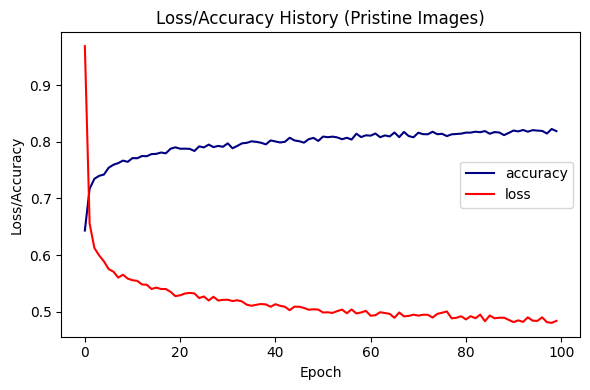

In [12]:
## Gráficos do histórico de treinamento
loss = history.history['loss']
#val_loss = history.history['val_loss']
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

epochs = list(range(len(loss)))
figsize = (6, 4)
fig, axis1 = plt.subplots(figsize=figsize)

plot1_lacc = axis1.plot(epochs, acc, 'navy', label='accuracy')
#plot1_val_lacc = axis1.plot(epochs, val_acc, 'deepskyblue', label="validation accuracy")

plot1_loss = axis1.plot(epochs, loss, 'red', label='loss')
#plot1_val_loss = axis1.plot(epochs, val_loss, 'lightsalmon', label="validation loss")

#plots = plot1_loss + plot1_val_loss + plot1_lacc + plot1_val_lacc
plots = plot1_loss+plot1_lacc
labs = [l.get_label() for l in plots]
axis1.set_xlabel('Epoch')
axis1.set_ylabel('Loss/Accuracy')
plt.title("Loss/Accuracy History (Pristine Images)")
plt.tight_layout()
axis1.legend(loc='center right')

plt.show()

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
cm [[1144.  318.]
 [ 300. 1324.]]

 cm_norm [[0.78248974 0.21751026]
 [0.18472906 0.81527094]]

 AUC: 0.8896165924268666


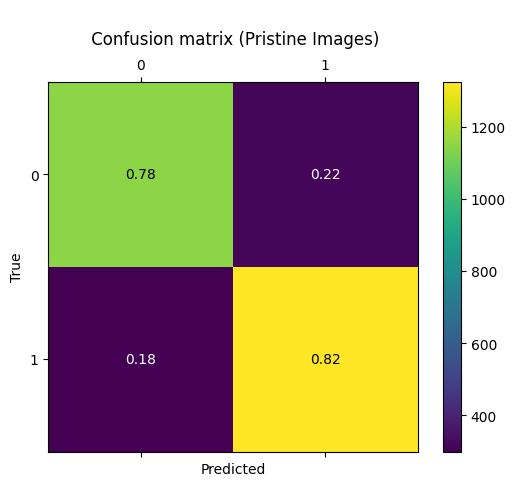

In [13]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, brier_score_loss  # Use brier_score_loss
from matplotlib.colors import LogNorm

history_data = history
prob = model.predict(X_test)
pred =  (prob > 0.5).astype('int32')

# measure confusion
labels=[0, 1]
cm = confusion_matrix(Y_test, pred[:,0], labels=labels)  # Use Y_test here
cm = cm.astype('float')
cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]
print("cm", cm)
print("\n cm_norm", cm_norm)

fpr, tpr, thresholds = roc_curve(Y_test, prob, pos_label=1)  # Use Y_test here
auc = roc_auc_score(Y_test, prob)
print("\n AUC:", auc)

#plotting
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('\n Confusion matrix (Pristine Images)', y=1.08)
fig.colorbar(cax)

# Defina as posições dos ticks
ax.set_xticks([0, 1])  # Define as posições dos ticks no eixo x
ax.set_yticks([0, 1])  # Define as posições dos ticks no eixo y

# Agora defina as labels dos ticks
ax.set_xticklabels(labels)  # Remove o elemento vazio da lista
ax.set_yticklabels(labels)  # Remove o elemento vazio da lista

plt.xlabel('Predicted')
plt.ylabel('True')
fmt = '.2f'
thresh = cm_norm.max() / 2.
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        ax.text(j, i, format(cm_norm[i, j], fmt),
        ha="center", va="center",
        color="white" if cm_norm[i, j] < thresh else "black")
plt.show()

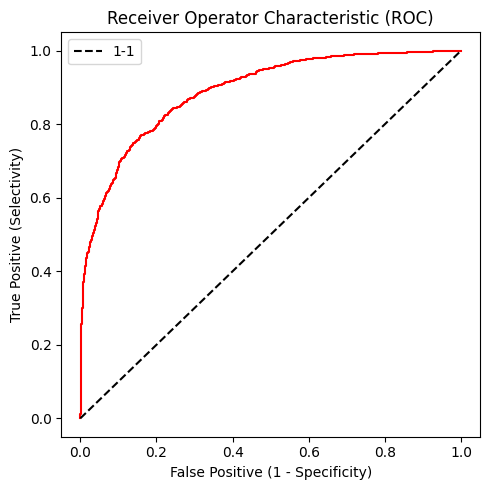

In [14]:
# ROC TEST SET
figsize=(5,5)
fig, axis1 = plt.subplots(figsize=figsize)
x_onetoone = y_onetoone = [0, 1]
plt.plot(fpr, tpr, 'r-')
plt.plot(x_onetoone, y_onetoone, 'k--',  label="1-1")
plt.legend(loc=0)
plt.title("Receiver Operator Characteristic (ROC)")
plt.xlabel("False Positive (1 - Specificity)")
plt.ylabel("True Positive (Selectivity)")
plt.tight_layout() 

In [15]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, pred[:,0])  # Access the first column
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(Y_test, pred[:,0])  # Access the first column
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, pred[:,0])  # Access the first column
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, pred[:,0])  # Access the first column
print('F1 score: %f' % f1)

# brier score
bs = brier_score_loss(Y_test, prob)
print('Brier score: %f' % bs)

Accuracy: 0.799741
Precision: 0.806334
Recall: 0.815271
F1 score: 0.810778
Brier score: 0.136009


número de FN, FP, TN, TP = 300, 318, 1144, 1324 (9.7%, 10.3%, 37.1%, 42.9%)


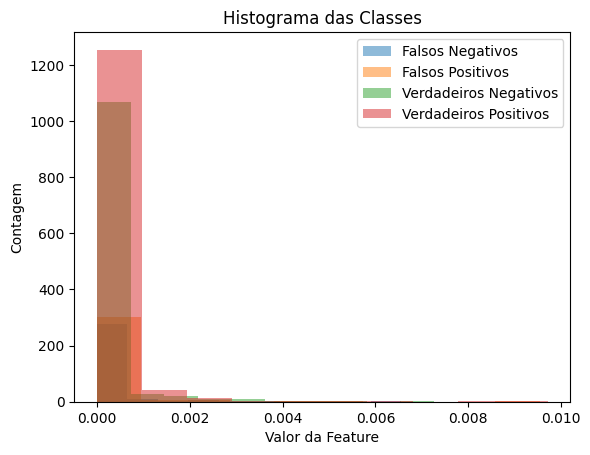

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# ... seu código para calcular Pred_error, N_test, Number_of_false_negatives, 
#     Number_of_false_positives, Number_of_true_positives, Number_of_true_negatives ...

# Achatar X_test
X_test_flat = X_test.flatten()  

# Criando os arrays com o tamanho correto
FN = np.zeros_like(X_test_flat[:Number_of_false_negatives])
FP = np.zeros_like(X_test_flat[:Number_of_false_positives])
TN = np.zeros_like(X_test_flat[:Number_of_true_negatives])
TP = np.zeros_like(X_test_flat[:Number_of_true_positives])

# Preenchendo os arrays
count_FN, count_FP, count_TN, count_TP = 0, 0, 0, 0
for i in range(N_test):
    if Pred_error[i] == 1:
        FN[count_FN] = X_test_flat[i]
        count_FN += 1
    if Pred_error[i] == -1:
        FP[count_FP] = X_test_flat[i]
        count_FP += 1
    if (Y_test[i]+pred[i,0]) == 0:
        TN[count_TN] = X_test_flat[i]
        count_TN += 1
    if (Y_test[i]+pred[i,0]) == 2:
        TP[count_TP] = X_test_flat[i]
        count_TP += 1

print(f"número de FN, FP, TN, TP = {count_FN}, {count_FP}, {count_TN}, {count_TP}", end = ' ')
print('({:.1f}%, {:.1f}%, {:.1f}%, {:.1f}%)'.format(100*count_FN/N_test, 100*count_FP/N_test, 100*count_TN/N_test, 100*count_TP/N_test))

# Histogramas
plt.figure()
plt.hist(FN, bins=10, alpha=0.5, label='Falsos Negativos')
plt.hist(FP, bins=10, alpha=0.5, label='Falsos Positivos')
plt.hist(TN, bins=10, alpha=0.5, label='Verdadeiros Negativos')
plt.hist(TP, bins=10, alpha=0.5, label='Verdadeiros Positivos')
plt.xlabel('Valor da Feature')
plt.ylabel('Contagem')
plt.legend()
plt.title('Histograma das Classes')
plt.show()

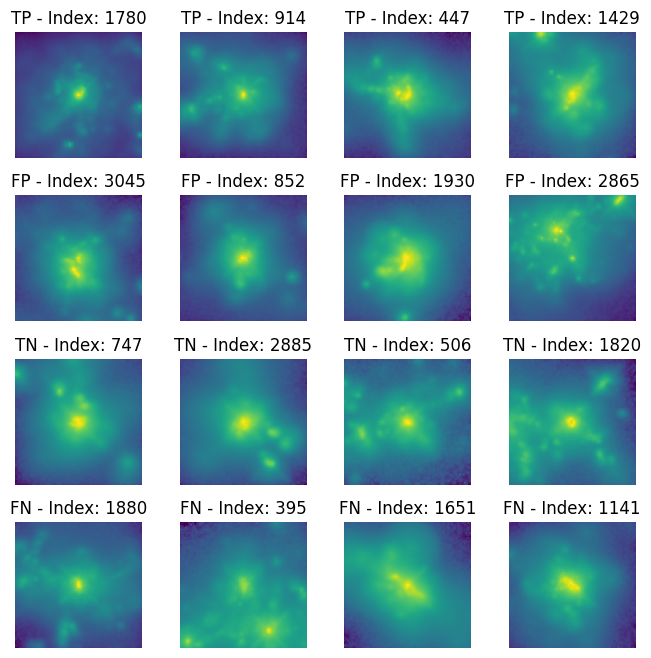

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import random

# Assumindo que você já tem as variáveis:
# X_test: suas imagens de teste
# Y_test: seus rótulos verdadeiros de teste
# pred: suas previsões do modelo

# Calculando os índices das imagens para cada categoria
TP_indices = np.where((Y_test + pred[:, 0]) == 2)[0]  
FP_indices = np.where(Pred_error == -1)[0]
TN_indices = np.where((Y_test + pred[:, 0]) == 0)[0]
FN_indices = np.where(Pred_error == 1)[0]

# Selecionando exemplos aleatórios de cada categoria
np.random.seed(206265) 
TP_examples = random.sample(list(TP_indices), min(len(TP_indices), 1324))
FP_examples = random.sample(list(FP_indices), min(len(FP_indices), 318))
TN_examples = random.sample(list(TN_indices), min(len(TN_indices), 1144))
FN_examples = random.sample(list(FN_indices), min(len(FN_indices), 300))

# Criando a lista de exemplos para visualização
examples = TP_examples[:4] + FP_examples[:4] + TN_examples[:4] + FN_examples[:4]

fig1 = plt.figure(figsize=(8, 8))
for i, image_index in enumerate(examples):
    #fig1.suptitle('From top row to bottom: TP, FP, TN, FN', fontsize=20)

    image = X_test[image_index]

    # Determine the label based on the position in the examples list
    label_mapping = {
        0: 'TP', 1: 'TP', 2: 'TP', 3: 'TP', 
        4: 'FP', 5: 'FP', 6: 'FP', 7: 'FP', 
        8: 'TN', 9: 'TN', 10: 'TN', 11: 'TN', 
        12: 'FN', 13: 'FN', 14: 'FN', 15: 'FN'
    }
    label = label_mapping.get(i, 'Unknown')

    plt.subplot(4, 4, i + 1)
    plt.axis("off")

    # Average the two channels to create a grayscale image
    grayscale_image = np.mean(image, axis=-1)

    # Display the grayscale image with the viridis colormap
    plt.imshow(grayscale_image, aspect='auto', cmap='viridis', norm=LogNorm()) 

    # Add a title for the subplot
    plt.title(f'{label} - Index: {image_index}', fontsize=12) # Mostrando o índice na legenda

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)  
plt.show()

In [29]:
# Reshape Y_test if necessary
if len(Y_test.shape) == 1:
    Y_test = Y_test.reshape(-1, 2) 

list_past = []
list_future = []
list_nonmerger = []
for i in range(len(Y_test)):
    if Y_test[i,0]==1 and Y_test[i,1]==1:
        list_past.append(prob[i])
    if Y_test[i,0]==1 and Y_test[i,1]==0:
        list_future.append(prob[i])
    if Y_test[i,0]==0:
        list_nonmerger.append(prob[i])

past = np.stack(list_past)
future = np.stack(list_future)
non = np.stack(list_nonmerger)

print('TEST SET OF PRISTINE IMAGES\n' 
      'Number of past mergers:', len(past) ,
      '\nNumber of future mergers:', len(future),
      '\nNumber of non-mergers:',len(non))

TEST SET OF PRISTINE IMAGES
Number of past mergers: 439 
Number of future mergers: 355 
Number of non-mergers: 749


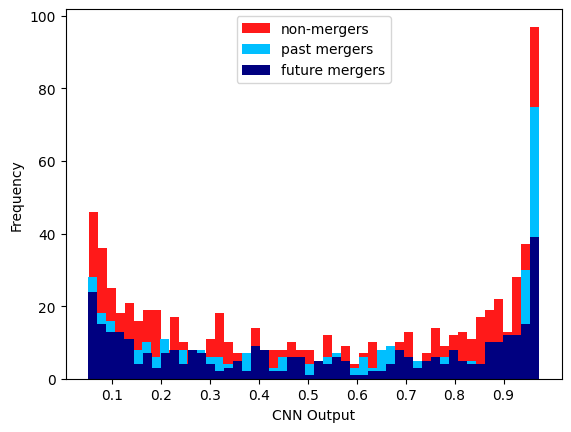

In [30]:
# plot histogram
bins = 50
plt.hist(non, bins, alpha=0.9, label='non-mergers', color='red')
plt.hist(past, bins, alpha=1, label='past mergers', color='deepskyblue')
plt.hist(future, bins, alpha=1, label='future mergers', color='navy')

# Adjust the plot
plt.legend(loc='upper center')
plt.xticks(np.arange(0.1, 1, step=0.1))
plt.yticks(np.arange(0, 101, step=20))  # Changed y-axis range
plt.xlabel("CNN Output")
plt.ylabel("Frequency")

plt.show()